In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from pathlib import Path
dd = Path('/workspaces/marketing-data/data')

In [2]:
busg = gpd.read_file(dd / 'BUSINESS_SITES.zip')
busg.head()

,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,...,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,...,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (6180956.367 2128315.164)
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,...,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (6180956.367 2128315.164)
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,...,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (6180956.367 2128315.164)
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,...,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (6180956.367 2128315.164)
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,...,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (6180956.367 2128315.164)


In [3]:
busg.head().T

,0,1,2,3,4
APN,1010100900.0,1010100900.0,1010100900.0,1010100900.0,1010100900.0
BCCCODE,131.0,291.0,314.0,314.0,404.0
OWNNAM1,PACIFIC MARINE CREDIT UNION,HRB TAX GROUP INC,NORTH COUNTY PIZZA INC,PIAZZA MANAGEMENT CORPORATION,BRIDGESTONE RETAIL
OWNNAM2,None,H&R BLOCK #6438,DBA DOMINOS PIZZA #8357,OF SAN DIEGO,OPERATIONS LLC
OWNNAM3,None,None,None,PIAZZA FAMILY RESTAURANTS INC,DBA FIRESTONE COMPLT AUTO CARE
CAREOF,ATTN ACCOUNTING DEPT,ATTN BUSINESS PP TAX #6438,None,DBA MCDONALDS #34729,ATTN TAX DEPT
STRNUM,1278.0,1.0,0.0,23113.0,200.0
STRFRA,None,None,None,None,None
STRDIR,None,None,None,None,S
STRNAM,ROCKY POINT,H&R BLOCK,PO BOX 4489,PLAZA POINTE,4TH


In [4]:
def make_business_list():
        t = pd.concat( pd.read_csv(e) for e in dd.glob('sd_business*.csv') )

        sw_codes = [ 334610,423430,513210,518210, 541511, 611420, 57111]
        sw_codes.extend([   541,  54161,  54151, 541514,   5415,  54199, 811219, 
                33441,   3344,  6114])
        sw_codes.extend([int(str(c)[:4]) for c in sw_codes])
        sw_codes = list(sorted(set(sw_codes)))

        t = t[t.NAICS.isin(sw_codes)]
        t = t[[ 'DBA NAME', 'OWNERSHIP TYPE', 'ADDRESS', 'CITY', 'ZIP', 'STATE', 'BUSINESS PHONE', 'OWNER NAME', 'CREATION DT', 'NAICS', 'ACTIVITY DESC']]

        cities = ['SAN DIEGO', 'LAKESIDE', 'SPRING VALLEY',  'LA JOLLA',
        'SAN MARCOS', 'POWAY', 'VISTA', 'SOLANA BEACH', 'SANTEE',
        'ESCONDIDO', 'NATIONAL CITY', 'CARLSBAD', 'EL CAJON', 'OCEANSIDE', 'CHULA VISTA']

        t = t[t['CITY'].isin(cities)]

        t = t[t['DBA NAME'] != 'H & R BLOCK']

        bus = t[t['OWNERSHIP TYPE'].isin(['CORP','SCORP'])]
        return bus

# This is the manually vetted reduction of the file from make_business_list
bus = pd.read_csv( dd / 'computer_companies_vetted.csv')

t = busg.merge(bus, right_on='OWNER NAME', left_on='OWNNAM1')
len(t)


cols = [ 'DBA NAME', 'OWNERSHIP TYPE', 'ADDRESS', 'NAICS', 'ACTIVITY DESC', 'geometry']

sd_soft = t[cols].copy()


len(sd_soft)

157

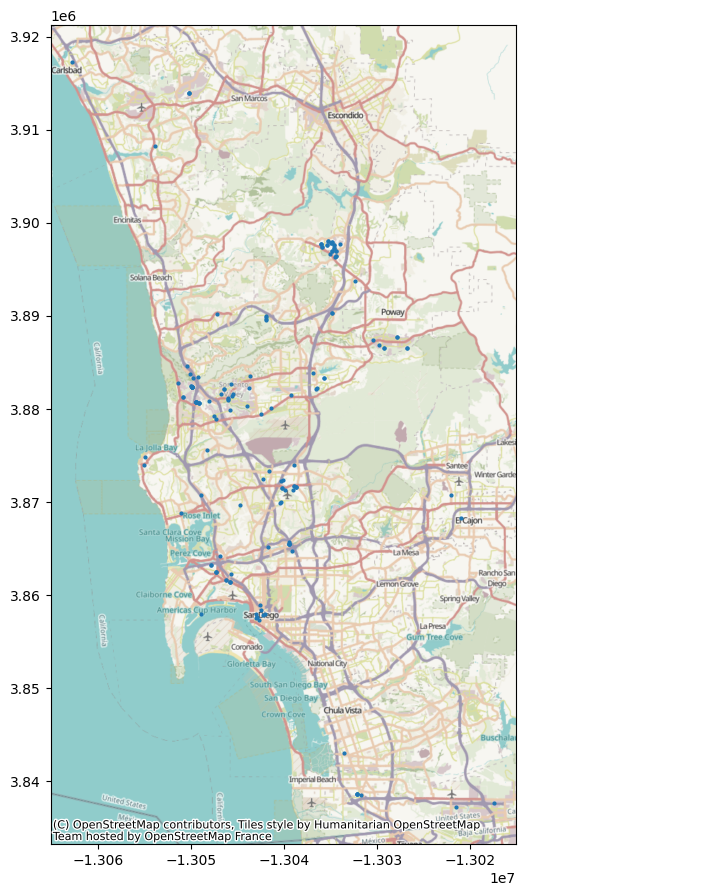

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6,15))  

t = sd_soft.to_crs(epsg=3857) # Make it web mercator to match the basemap

t.plot(markersize=4,   legend=True, ax=ax)

cx.add_basemap(ax)
#leg = ax.get_legend()                                                                         
#leg.set_bbox_to_anchor((1, 1))  

t.to_file(dd / "computer_companies.geojson", driver='GeoJSON')

In [ ]:
sd_soft.sample(10)[['DBA NAME', 'NAICS', 'ACTIVITY DESC']]

,DBA NAME,NAICS,ACTIVITY DESC
21,PANDA EXPRESS #758,5419,OTH PROFESSIONAL/SCIENTIFIC/TECHNICAL SERVICE
360,SUNSTATE EQUIPMENT CO LLC,541,"PROFESSIONAL, SCIENTIFIC & TECHNICAL SERVICES"
75,UNIFIRST CORPORATION,5419,OTH PROFESSIONAL/SCIENTIFIC/TECHNICAL SERVICE
511,EXPRESS FINANCIAL SERVICES/PAWN BROKER,5419,OTH PROFESSIONAL/SCIENTIFIC/TECHNICAL SERVICE
540,PAYCHEX NORTH AMERICA INC,541,"PROFESSIONAL, SCIENTIFIC & TECHNICAL SERVICES"
96,EPLICA INC,541,"PROFESSIONAL, SCIENTIFIC & TECHNICAL SERVICES"
177,SHORELINE BIOSCIENCES INC,5419,OTH PROFESSIONAL/SCIENTIFIC/TECHNICAL SERVICE
499,U S A JETTING DRAIN PROS INC,54199,"ALL OTH PROF, SCIENTIFIC & TECHNICAL SERVICES"
640,SOUTHWEST STRATEGIES LLC,541,"PROFESSIONAL, SCIENTIFIC & TECHNICAL SERVICES"
50,PANDA EXPRESS #758,5419,OTH PROFESSIONAL/SCIENTIFIC/TECHNICAL SERVICE


In [ ]:
sd_soft['ACTIVITY DESC'].value_counts()

OTH PROFESSIONAL/SCIENTIFIC/TECHNICAL SERVICE    285
PROFESSIONAL, SCIENTIFIC & TECHNICAL SERVICES    196
ALL OTH PROF, SCIENTIFIC & TECHNICAL SERVICES    130
MANAGEMENT CONSULTING SERVICES                    28
COMPUTER SYSTEMS DESIGN & RELATED SERVICES        21
SEMICONDUCTOR & OTH ELECTRONIC COMPONENT MFG      18
IT SERVICES & SUPPORT                             16
CUSTOM COMPUTER PROGRAMMING SERVICES              11
MANAGEMENT, SCI & TECH CONSULTING SERVICES         9
OTHER ELECTRONIC & PRECISION EQUIPMENT R&M         8
ELECTRONIC & PRECISION EQUIPMENT R&M               3
Name: ACTIVITY DESC, dtype: int64